In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bank=pd.read_csv("bank-full.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
bank=bank.drop(['contact','day','month','poutcome'],axis=1)

In [7]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,no


In [8]:
from sklearn.preprocessing import LabelEncoder
columns=['job','marital','education','default','housing','loan']
label_encoder=LabelEncoder()
target_encoder=LabelEncoder()
for col in columns:
    bank[col]=label_encoder.fit_transform(bank[col])
bank['Target']=target_encoder.fit_transform(bank['Target'])


In [9]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,Target
45206,51,9,1,2,0,825,0,0,977,3,-1,0,1
45207,71,5,0,0,0,1729,0,0,456,2,-1,0,1
45208,72,5,1,1,0,5715,0,0,1127,5,184,3,1
45209,57,1,1,1,0,668,0,0,508,4,-1,0,0
45210,37,2,1,1,0,2971,0,0,361,2,188,11,0


In [10]:
X=bank.iloc[:,:-1].values
Y=bank.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
entropy=DecisionTreeClassifier(criterion='entropy',random_state=42)
gini=DecisionTreeClassifier(criterion='gini',random_state=42)


In [13]:
entropy_fitted=entropy.fit(x_train,y_train)
gini_fitted=gini.fit(x_train,y_train)

In [14]:
entropy_pred=entropy.predict(x_test)
gini_pred=entropy.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
entropy_score=accuracy_score(y_test,entropy_pred)
gini_score=accuracy_score(y_test,gini_pred)

In [16]:
print('Entropy score: {:.2f}'.format(entropy_score*100))
print('Gini score: {:.2f}'.format(gini_score*100))

Entropy score: 85.26
Gini score: 85.26


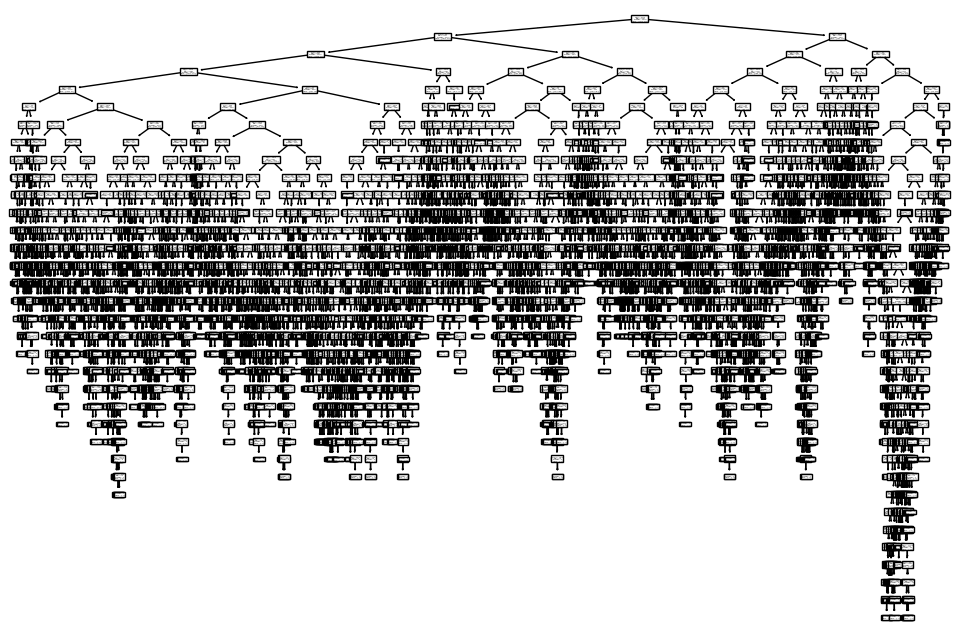

In [19]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
tree.plot_tree(gini_fitted)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
rfc_20=RandomForestClassifier(n_estimators=20,random_state=42)
rfc_50=RandomForestClassifier(n_estimators=50,random_state=42)
rfc_100=RandomForestClassifier(n_estimators=100,random_state=42)
                              

In [22]:
rfc_20.fit(x_train,y_train)
rfc_50.fit(x_train,y_train)
rfc_100.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
rfc_20_pred=rfc_20.predict(x_test)
rfc_50_pred=rfc_50.predict(x_test)
rfc_100_pred=rfc_100.predict(x_test)

In [26]:
print("Model accuracy with 20 estimators: {:.4f}".format(accuracy_score(y_test,rfc_20_pred)*100))
print("Model accuracy with 50 estimators: {:.4f}".format(accuracy_score(y_test,rfc_50_pred)*100))
print("Model accuracy with 100 estimators: {:.4f}".format(accuracy_score(y_test,rfc_100_pred)*100))

Model accuracy with 20 estimators: 88.9307
Model accuracy with 50 estimators: 89.1629
Model accuracy with 100 estimators: 89.2845


In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
adaboost_model=AdaBoostClassifier(estimator=gini,n_estimators=50,random_state=42)

In [31]:
adaboost_model.fit(x_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [32]:
y_pred=adaboost_model.predict(x_test)

In [35]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: {:.4f}".format(accuracy*100))

Accuracy: 84.6953


In [37]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/b8/84/9d0618b1bc0d9dd421b9a44a472535e353c27703ae42ab8db86b2ea33a25/xgboost-3.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.0/149.9 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.0/149.9 MB 196.9 kB/s eta 0:12:41
   ---------------------------------------- 0.1/149.9 MB 280.5 kB/s eta 0:08:55
   ---------------------------------------- 0.1/149.9 MB 327.7 kB/s eta 0:07:38
   ---------------------------------------- 0.1/149.9 MB 327.7 kB/s eta 0:07:38
   ---------------------------------------- 0.1/149.9 MB 285.2 kB/s eta 0:08:46
   ---------------------------------------- 0.1/149.9 MB 288.8 kB/s eta 0:08:39
   ----------


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import xgboost as xgb

In [39]:
xgb_model=xgb.XGBClassifier(estimator=gini,objective="binary:logistic",random_state=42)

In [40]:
xgb_model.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
y_pred=xgb_model.predict(x_test)

In [43]:
xgb_accuracy=accuracy_score(y_test,y_pred)
print("Binary accuracy",xgb_accuracy*100)

Binary accuracy 89.11865531350216
